<h2>Energy Consumption Prediction - Machine Learning Model</h2>
<ul>
    <li>Energy Consumption refers to the amount of enegy consumed.</li>
    <li>The objective is to accurately estimate energy usage based
on factors that influence the amount of energy consumed</li>
    <li>The folloowing factors will be taken into consideration: 
    <ul>
        <li>Time-based features (hour of the day, day of the week, season, etc.)</li>
        <li>Weather conditions (temperature, humidity, wind speed, etc.)</li>
        <li>Building characteristics (occupancy levels, squarefootage , etc.)</li>
        <li>The Energy consumption history and patterns.</li>
        </ul>
    </li>
</ul><br>
<p>By analyzing these diverse features, the model will identify various kinds of relationships and patterns, enabling precise energy consumption predictions. This data-driven approach
has the potential to fully alter the energy management practices, leading to significant
economic and environmental benefits.</p>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('Energy_consumption.csv')

In [8]:
df.head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732

In [9]:
df.tail()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

    HVACUsage LightingUsage  RenewableEnergy DayOfWeek Holiday  \
995       Off           Off        21.194696  Saturday      No   
996       Off            On        25.748176   Tuesday     Yes   
997       Off            On         0.297079    Friday     Yes   
998        On           Off        20.425163  Thursday     Yes   
999       Off            On         2.455657  Saturday      No   

     EnergyConsumption  
995          82.306692  
996          66.577320  
997          72.753471  
998          76.950389  
999          71.545311

In [10]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [11]:
df.describe()

Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015975    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120

In [12]:
df.describe

<bound method NDFrame.describe of                Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

    HVACUsage LightingUsage  

In [13]:
"DATA CLEANING"

'DATA CLEANING'

In [14]:
df.isnull()

Timestamp  Temperature  Humidity  SquareFootage  Occupancy  HVACUsage  \
0        False        False     False          False      False      False   
1        False        False     False          False      False      False   
2        False        False     False          False      False      False   
3        False        False     False          False      False      False   
4        False        False     False          False      False      False   
..         ...          ...       ...            ...        ...        ...   
995      False        False     False          False      False      False   
996      False        False     False          False      False      False   
997      False        False     False          False      False      False   
998      False        False     False          False      False      False   
999      False        False     False          False      False      False   

     LightingUsage  RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  
0            False            False      False    False              False  
1            False            False      False    False              False  
2            False            False      False    False              False  
3            False            False      False    False              False  
4            False            False      False    False              False  
..             ...              ...        ...      ...                ...  
995          False            False      False    False              False  
996          False            False      False    False              False  
997          False            False      False    False              False  
998          False            False      False    False              False  
999          False            False      False    False              False  

[1000 rows x 11 columns]

In [15]:
df.notnull()

Timestamp  Temperature  Humidity  SquareFootage  Occupancy  HVACUsage  \
0         True         True      True           True       True       True   
1         True         True      True           True       True       True   
2         True         True      True           True       True       True   
3         True         True      True           True       True       True   
4         True         True      True           True       True       True   
..         ...          ...       ...            ...        ...        ...   
995       True         True      True           True       True       True   
996       True         True      True           True       True       True   
997       True         True      True           True       True       True   
998       True         True      True           True       True       True   
999       True         True      True           True       True       True   

     LightingUsage  RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  
0             True             True       True     True               True  
1             True             True       True     True               True  
2             True             True       True     True               True  
3             True             True       True     True               True  
4             True             True       True     True               True  
..             ...              ...        ...      ...                ...  
995           True             True       True     True               True  
996           True             True       True     True               True  
997           True             True       True     True               True  
998           True             True       True     True               True  
999           True             True       True     True               True  

[1000 rows x 11 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [17]:
value_map = {"On": 1, "Off": 0}
for col in ["HVACUsage", "LightingUsage"]:
  df[col] = df[col].replace(value_map)

In [18]:
df.head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

   HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0          1              0         2.774699     Monday      No   
1          1              1        21.831384   Saturday      No   
2          0              0         6.764672     Sunday      No   
3          0              1         8.623447  Wednesday      No   
4          1              0         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732

In [19]:
df.tail()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

     HVACUsage  LightingUsage  RenewableEnergy DayOfWeek Holiday  \
995          0              0        21.194696  Saturday      No   
996          0              1        25.748176   Tuesday     Yes   
997          0              1         0.297079    Friday     Yes   
998          1              0        20.425163  Thursday     Yes   
999          0              1         2.455657  Saturday      No   

     EnergyConsumption  
995          82.306692  
996          66.577320  
997          72.753471  
998          76.950389  
999          71.545311

In [20]:
value_map1 = {"Yes": 1, "No": 0}
for col in ["Holiday"]:
  df[col] = df[col].replace(value_map1)

In [21]:
df.head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

   HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  \
0          1              0         2.774699     Monday        0   
1          1              1        21.831384   Saturday        0   
2          0              0         6.764672     Sunday        0   
3          0              1         8.623447  Wednesday        0   
4          1              0         3.071969     Friday        0   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732

In [22]:
df.tail()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

     HVACUsage  LightingUsage  RenewableEnergy DayOfWeek  Holiday  \
995          0              0        21.194696  Saturday        0   
996          0              1        25.748176   Tuesday        1   
997          0              1         0.297079    Friday        1   
998          1              0        20.425163  Thursday        1   
999          0              1         2.455657  Saturday        0   

     EnergyConsumption  
995          82.306692  
996          66.577320  
997          72.753471  
998          76.950389  
999          71.545311

In [23]:
value_map2 = {"Sunday": 1, "Monday": 2, "Tuesday": 3, "Wednesday": 4, "Thursday": 5, "Friday": 6, "Saturday": 7}
for col in ["DayOfWeek"]:
  df[col] = df[col].replace(value_map2)

In [24]:
df.head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

   HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  \
0          1              0         2.774699          2        0   
1          1              1        21.831384          7        0   
2          0              0         6.764672          1        0   
3          0              1         8.623447          4        0   
4          1              0         3.071969          6        0   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732

In [25]:
df.tail()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

     HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  \
995          0              0        21.194696          7        0   
996          0              1        25.748176          3        1   
997          0              1         0.297079          6        1   
998          1              0        20.425163          5        1   
999          0              1         2.455657          7        0   

     EnergyConsumption  
995          82.306692  
996          66.577320  
997          72.753471  
998          76.950389  
999          71.545311

In [26]:
try:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d %H:%M:%S")
except:
    print("error converting")
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second

In [27]:
df.head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0 2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1 2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2 2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3 2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4 2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

   HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  \
0          1              0         2.774699          2        0   
1          1              1        21.831384          7        0   
2          0              0         6.764672          1        0   
3          0              1         8.623447          4        0   
4          1              0         3.071969          6        0   

   EnergyConsumption  Year  Month  Day  Hour  Minute  Second  
0          75.364373  2022      1    1     0       0       0  
1          83.401855  2022      1    1     1       0       0  
2          78.270888  2022      1    1     2       0       0  
3          56.519850  2022      1    1     3       0       0  
4          70.811732  2022      1    1     4       0       0

In [28]:
df = df.drop('Timestamp', axis=1)

In [29]:
df.head()

Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  LightingUsage  \
0    25.139433  43.431581    1565.693999          5          1              0   
1    27.731651  54.225919    1411.064918          1          1              1   
2    28.704277  58.907658    1755.715009          2          0              0   
3    20.080469  50.371637    1452.316318          1          0              1   
4    23.097359  51.401421    1094.130359          9          1              0   

   RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  Year  Month  Day  \
0         2.774699          2        0          75.364373  2022      1    1   
1        21.831384          7        0          83.401855  2022      1    1   
2         6.764672          1        0          78.270888  2022      1    1   
3         8.623447          4        0          56.519850  2022      1    1   
4         3.071969          6        0          70.811732  2022      1    1   

   Hour  Minute  Second  
0     0       0       0  
1     1       0       0  
2     2       0       0  
3     3       0       0  
4     4       0       0

In [30]:
df.tail()

Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  \
995    28.619382  48.850160    1080.087000          5          0   
996    23.836647  47.256435    1705.235156          4          0   
997    23.005340  48.720501    1320.285281          6          0   
998    25.138365  31.306459    1309.079719          3          1   
999    23.051165  42.615421    1018.140606          6          0   

     LightingUsage  RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  \
995              0        21.194696          7        0          82.306692   
996              1        25.748176          3        1          66.577320   
997              1         0.297079          6        1          72.753471   
998              0        20.425163          5        1          76.950389   
999              1         2.455657          7        0          71.545311   

     Year  Month  Day  Hour  Minute  Second  
995  2022      2   11    11       0       0  
996  2022      2   11    12       0       0  
997  2022      2   11    13       0       0  
998  2022      2   11    14       0       0  
999  2022      2   11    15       0       0

In [31]:
df.shape

(1000, 16)

In [32]:
df.describe()

Temperature     Humidity  SquareFootage    Occupancy    HVACUsage  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000     0.492000   
std       2.836850     8.518905     288.418873     2.865598     0.500186   
min      20.007565    30.015975    1000.512661     0.000000     0.000000   
25%      22.645070    38.297722    1247.108548     2.000000     0.000000   
50%      24.751637    45.972116    1507.967426     5.000000     0.000000   
75%      27.418174    52.420066    1740.340165     7.000000     1.000000   
max      29.998671    59.969085    1999.982252     9.000000     1.000000   

       LightingUsage  RenewableEnergy    DayOfWeek      Holiday  \
count    1000.000000      1000.000000  1000.000000  1000.000000   
mean        0.491000        15.132813     4.049000     0.467000   
std         0.500169         8.745917     2.028476     0.499159   
min         0.000000         0.006642     1.000000     0.000000   
25%         0.000000         7.628385     2.000000     0.000000   
50%         0.000000        15.072296     4.000000     0.000000   
75%         1.000000        22.884064     6.000000     1.000000   
max         1.000000        29.965327     7.000000     1.000000   

       EnergyConsumption    Year       Month          Day         Hour  \
count        1000.000000  1000.0  1000.00000  1000.000000  1000.000000   
mean           77.055873  2022.0     1.25600    13.400000    11.436000   
std             8.144112     0.0     0.43664     9.037792     6.913009   
min            53.263278  2022.0     1.00000     1.000000     0.000000   
25%            71.544690  2022.0     1.00000     6.000000     5.000000   
50%            76.943696  2022.0     1.00000    11.000000    11.000000   
75%            82.921742  2022.0     2.00000    21.000000    17.000000   
max            99.201120  2022.0     2.00000    31.000000    23.000000   

       Minute  Second  
count  1000.0  1000.0  
mean      0.0     0.0  
std       0.0     0.0  
min       0.0     0.0  
25%       0.0     0.0  
50%       0.0     0.0  
75%       0.0     0.0  
max       0.0     0.0

In [33]:
"IMPORTING REQUIRED PACKAGES FOR VISUALISATION"

'IMPORTING REQUIRED PACKAGES FOR VISUALISATION'

In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

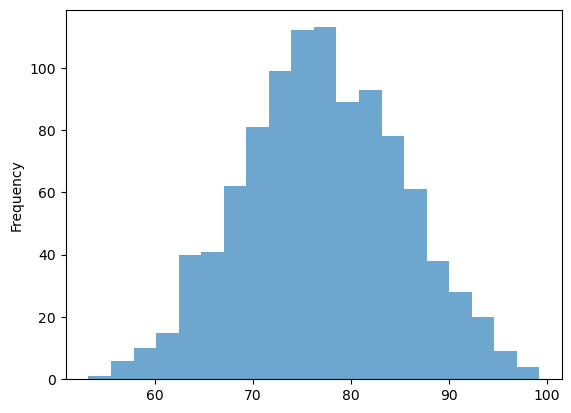

In [35]:
a = df['EnergyConsumption'].plot.hist(bins=20, alpha=0.65)

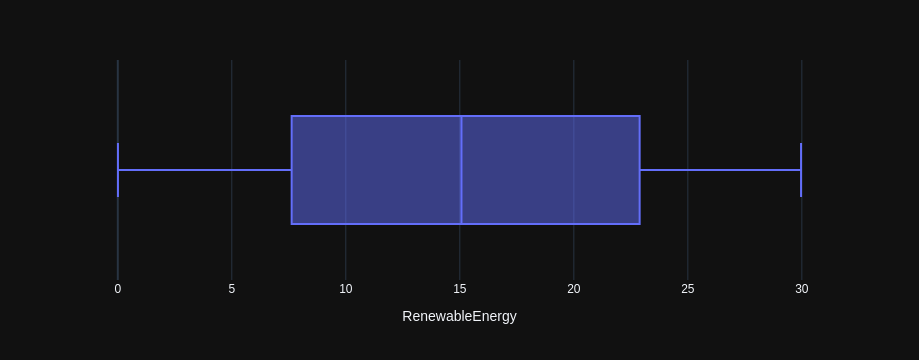

In [36]:
import plotly.express as px
fig1 = px.box(data_frame = df,
            x = "RenewableEnergy",
            width = 1000,
            height = 300)
fig1.update_layout({"template":"plotly_dark"})
fig1.show()

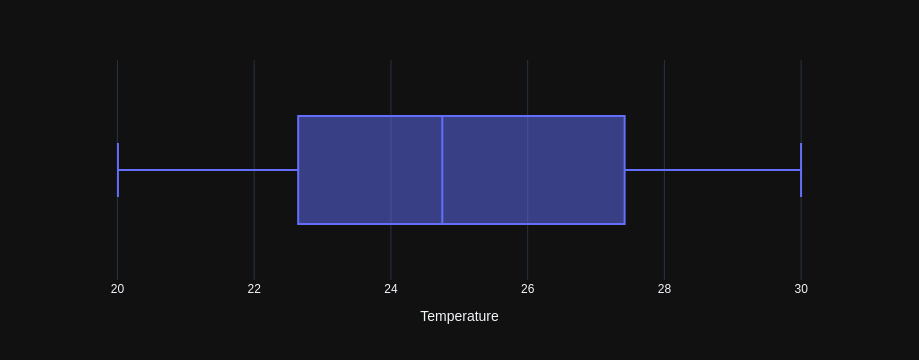

In [37]:
fig2 = px.box(data_frame = df,
            x = "Temperature",
            width = 1000,
            height = 300)
fig2.update_layout({"template":"plotly_dark"})
fig2.show()

/home/rgukt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



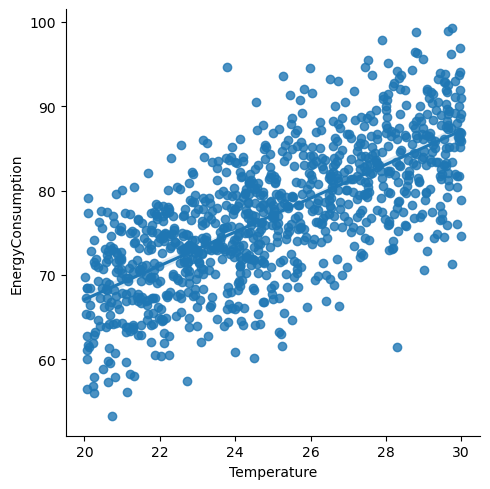

In [38]:
sns.lmplot(x ='Temperature', y ='EnergyConsumption', data = df);

<Axes: xlabel='EnergyConsumption'>

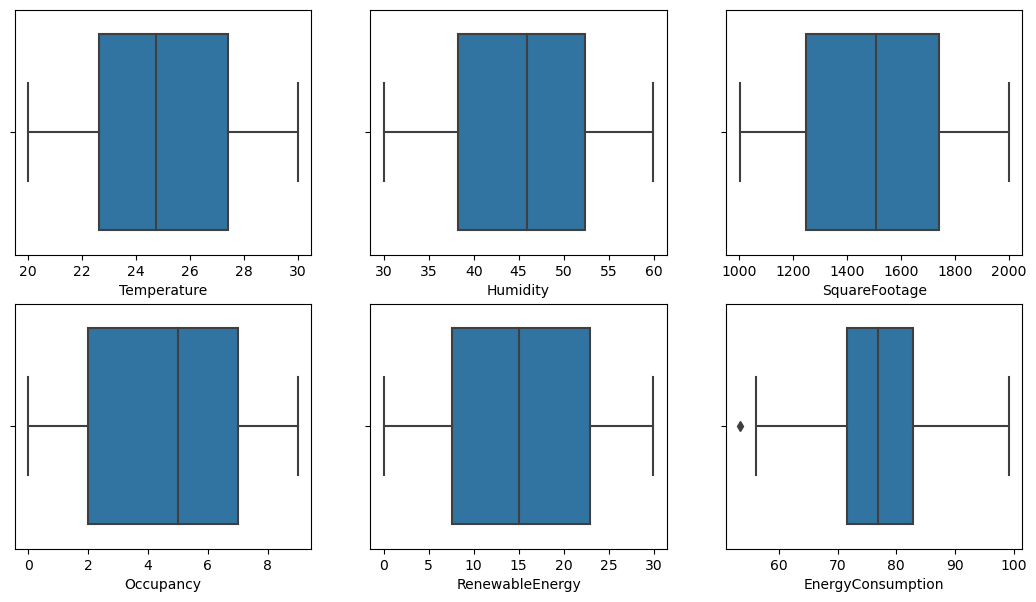

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(13, 7))

sns.boxplot(x=df['Temperature'], ax=axes[0][0])
sns.boxplot(x=df['Humidity'], ax=axes[0][1])
sns.boxplot(x=df['SquareFootage'], ax=axes[0][2])
sns.boxplot(x=df['Occupancy'], ax=axes[1][0])
sns.boxplot(x=df['RenewableEnergy'], ax=axes[1][1])
sns.boxplot(x=df['EnergyConsumption'], ax=axes[1][2])

<Axes: >

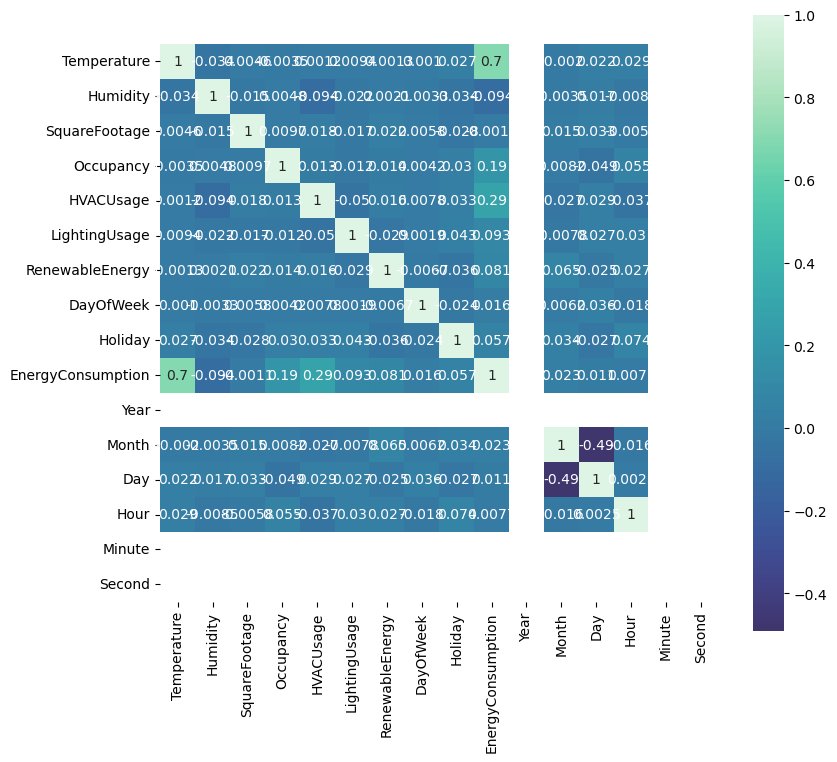

In [40]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),square=True , annot=True, cmap='mako',center= 0)

In [122]:
correlations = df.corr()['EnergyConsumption'].drop('EnergyConsumption')
print(correlations)

Temperature        0.696410
Humidity          -0.093583
SquareFootage     -0.001129
Occupancy          0.186580
HVACUsage          0.286464
LightingUsage      0.093423
RenewableEnergy    0.081160
DayOfWeek          0.016008
Holiday            0.056676
Year                    NaN
Month              0.023197
Day                0.010825
Hour               0.007718
Minute                  NaN
Second                  NaN
Name: EnergyConsumption, dtype: float64


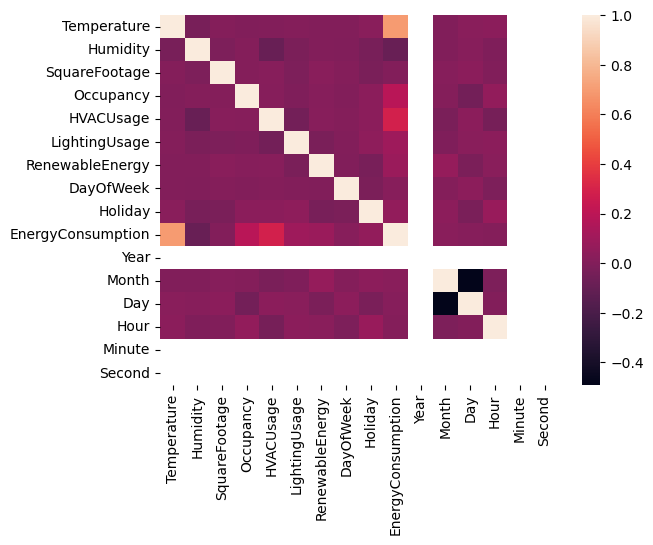

In [123]:
sns.heatmap(df.corr())
plt.show()

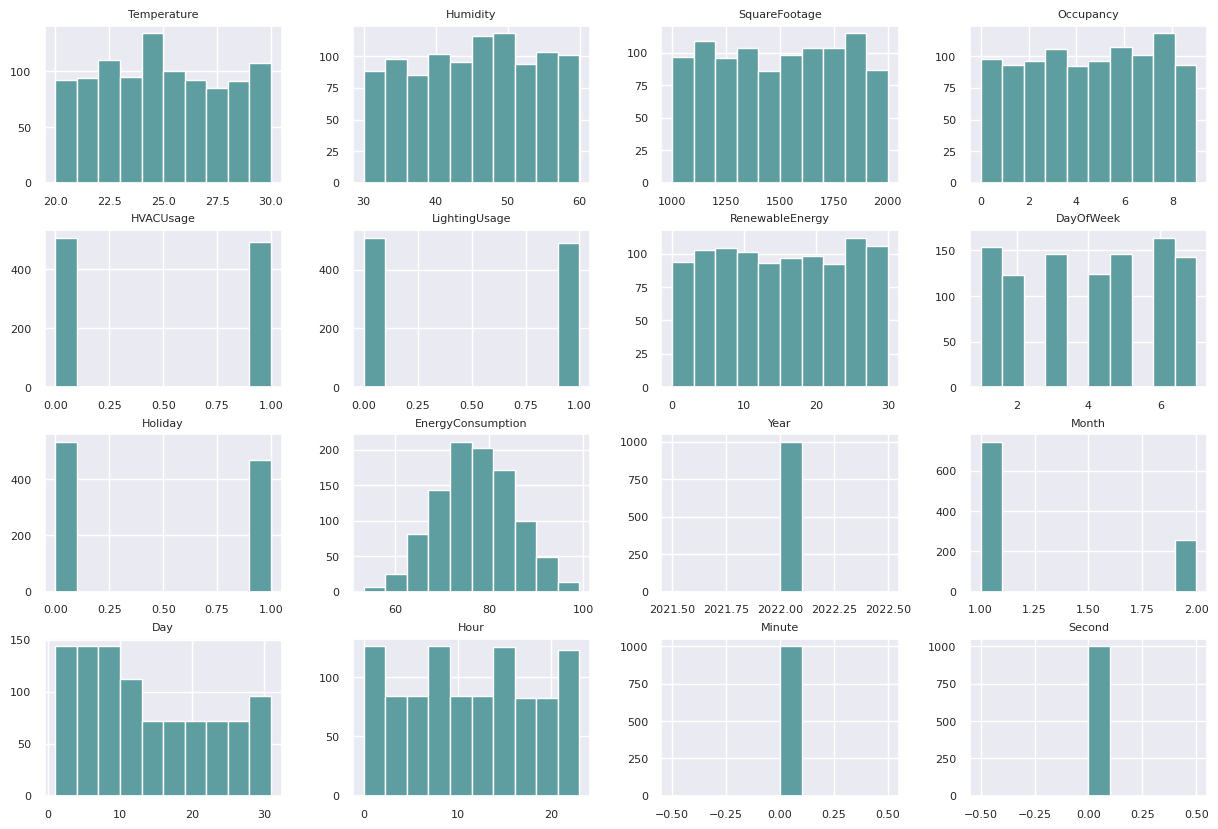

In [126]:
sns.set()
fig = df.hist(figsize=(15,10), color='#5F9EA0', xlabelsize=8, ylabelsize=8)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

<Axes: >

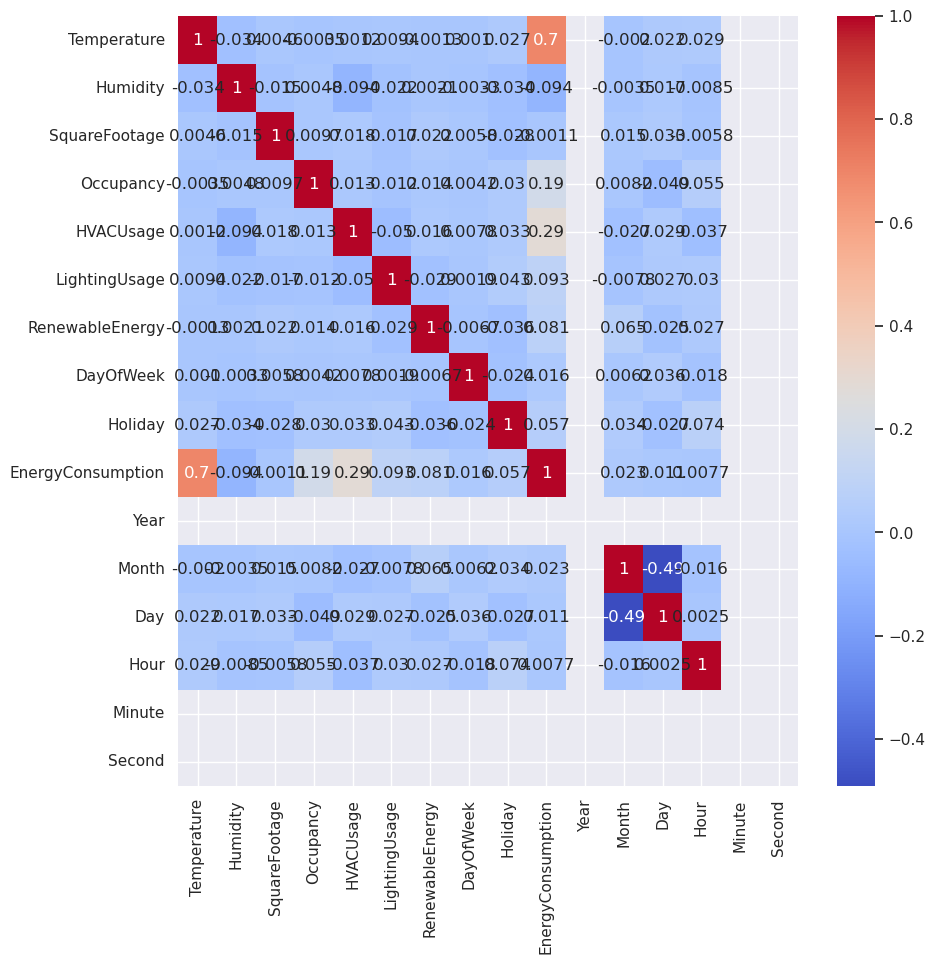

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm')

/home/rgukt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



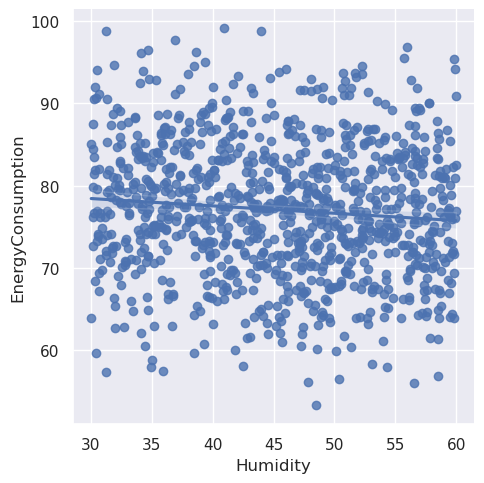

In [133]:
sns.lmplot(x ='Humidity', y ='EnergyConsumption', data = df );

/tmp/ipykernel_13697/1586780445.py:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




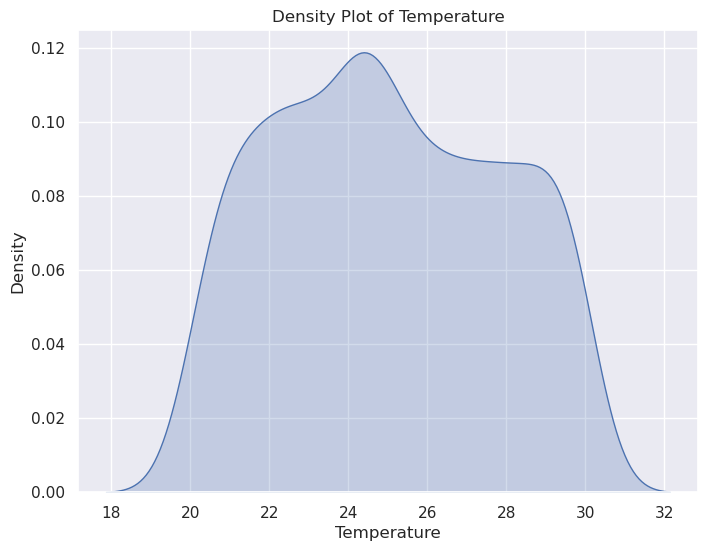

/tmp/ipykernel_13697/1586780445.py:28: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




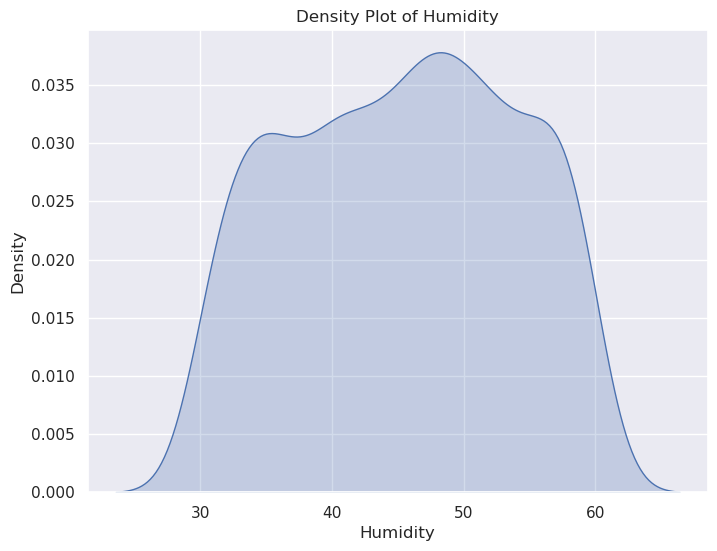

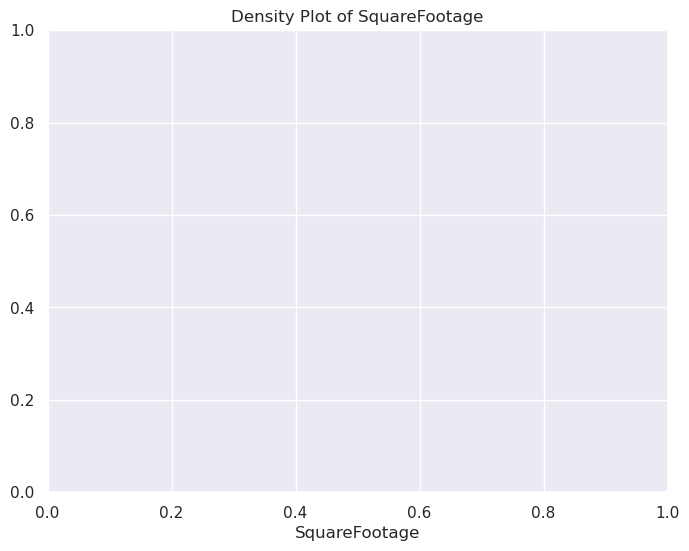

/tmp/ipykernel_13697/1586780445.py:42: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




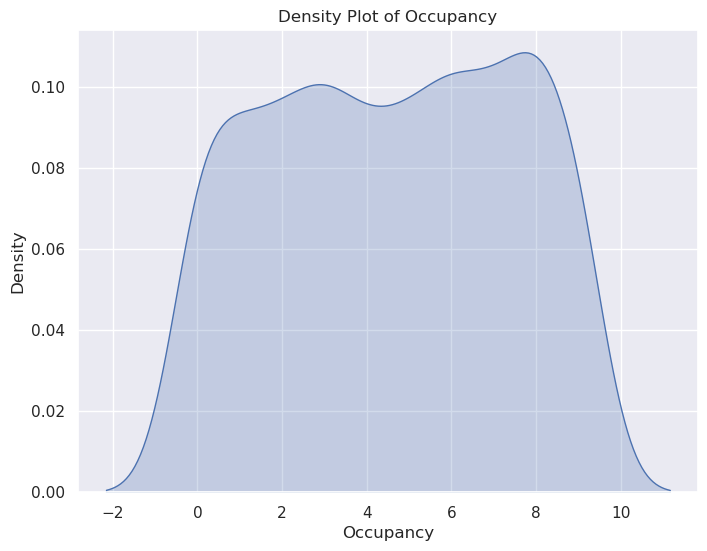

/tmp/ipykernel_13697/1586780445.py:50: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




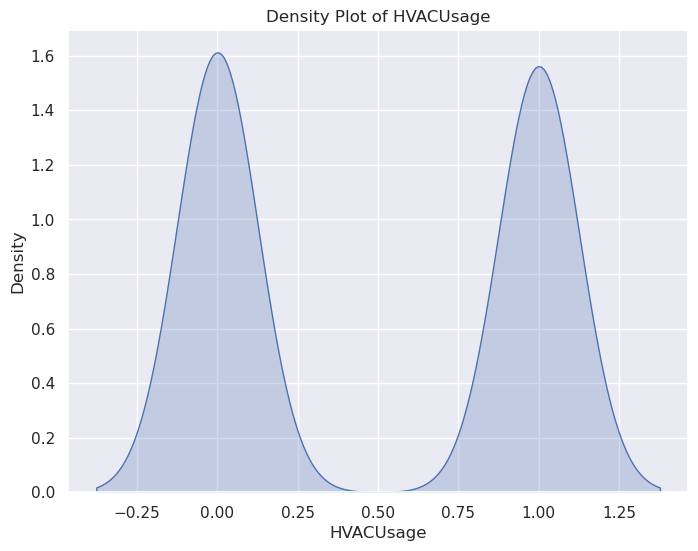

/tmp/ipykernel_13697/1586780445.py:58: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




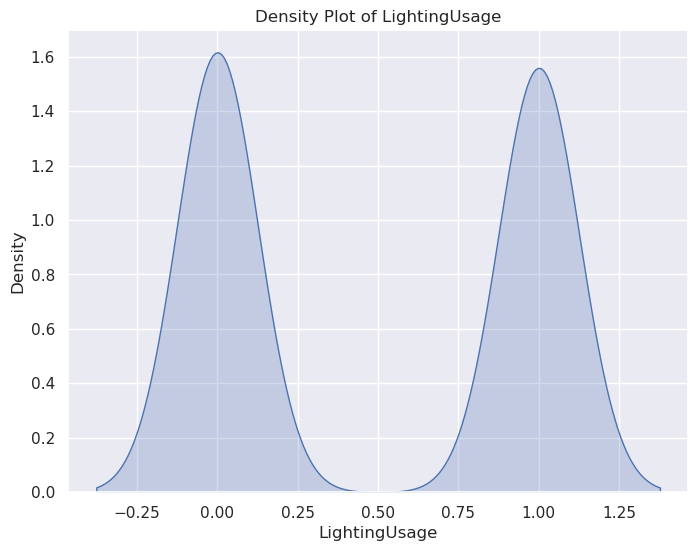

/tmp/ipykernel_13697/1586780445.py:66: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




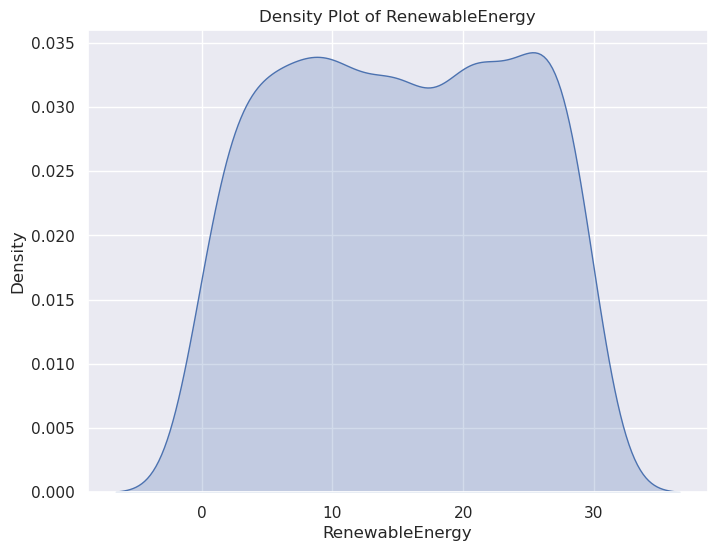

/tmp/ipykernel_13697/1586780445.py:74: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




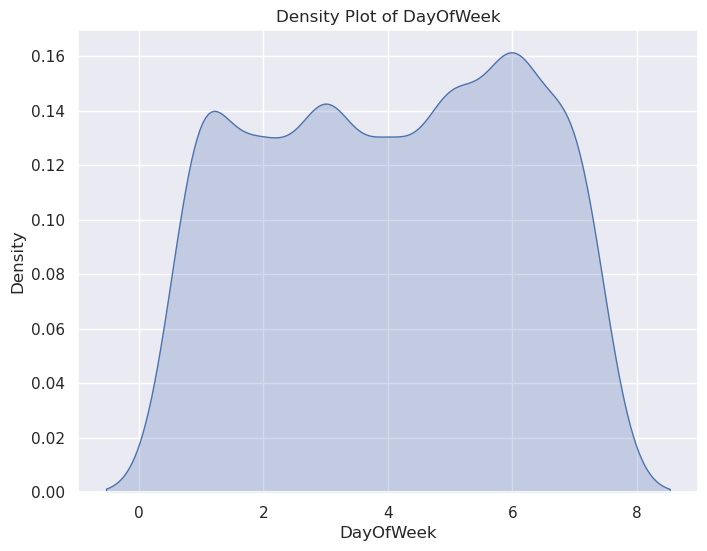

/tmp/ipykernel_13697/1586780445.py:82: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




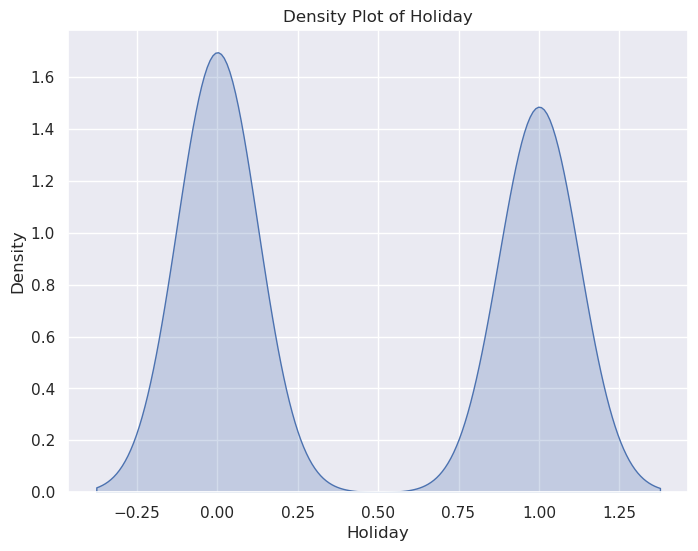

/tmp/ipykernel_13697/1586780445.py:90: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




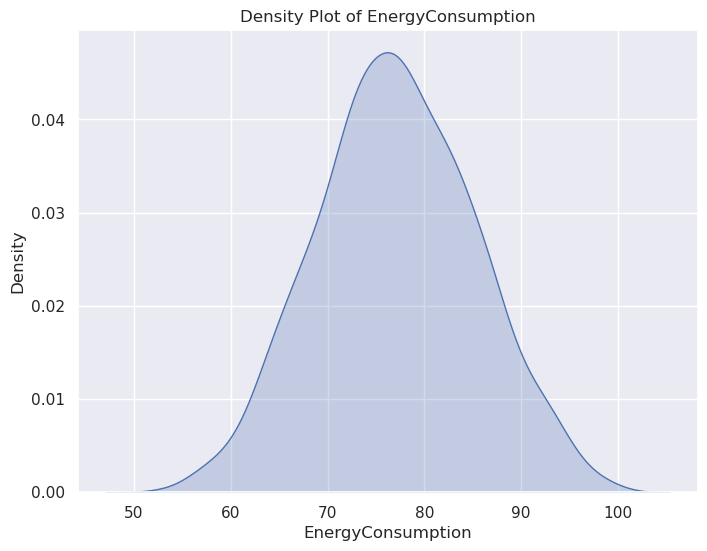

In [150]:
# Identify a numerical column suitable for density plot
numerical_columns = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']  # Find numerical columns

# Check if any numerical columns were found
if not numerical_columns:
    print("No numerical columns found in the data. Density plot creation not possible.")
else:
    numerical_column = numerical_columns[0]
    numerical_column1 = numerical_columns[1]
    numerical_column2 = numerical_columns[2]
    numerical_column3 = numerical_columns[3]
    numerical_column4 = numerical_columns[4]
    numerical_column5 = numerical_columns[5]
    numerical_column6 = numerical_columns[6]
    numerical_column7 = numerical_columns[7]
    numerical_column8 = numerical_columns[8]
    numerical_column9 = numerical_columns[9]

    plt.figure(figsize=(8, 6))  
    sns.kdeplot(df[numerical_column], shade=True)  
    plt.xlabel(numerical_column)  
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column) 
    plt.grid(True)  
    plt.show()
    
    plt.figure(figsize=(8, 6))  
    sns.kdeplot(df[numerical_column1], shade=True)  
    plt.xlabel(numerical_column1) 
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column1)  
    plt.grid(True) 
    plt.show()
    
    plt.figure(figsize=(8, 6))  
    plt.xlabel(numerical_column2) 
    plt.title('Density Plot of ' + numerical_column2) 
    plt.grid(True) 
    plt.show()
    
    plt.figure(figsize=(8, 6)) 
    sns.kdeplot(df[numerical_column3], shade=True)  
    plt.xlabel(numerical_column3)
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column3)  
    plt.grid(True)  
    plt.show()
    
    plt.figure(figsize=(8, 6))  
    sns.kdeplot(df[numerical_column4], shade=True) 
    plt.xlabel(numerical_column4) 
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column4) 
    plt.grid(True)  
    plt.show()
    
    plt.figure(figsize=(8, 6))  
    sns.kdeplot(df[numerical_column5], shade=True) 
    plt.xlabel(numerical_column5) 
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column5)  
    plt.grid(True) 
    plt.show()
    
    plt.figure(figsize=(8, 6)) 
    sns.kdeplot(df[numerical_column6], shade=True)  
    plt.xlabel(numerical_column6) 
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column6)  
    plt.grid(True)  
    plt.show()
    
    plt.figure(figsize=(8, 6))  
    sns.kdeplot(df[numerical_column7], shade=True) 
    plt.xlabel(numerical_column7) 
    plt.ylabel('Density') 
    plt.title('Density Plot of ' + numerical_column7)  
    plt.grid(True)  
    plt.show()
    
    plt.figure(figsize=(8, 6)) 
    sns.kdeplot(df[numerical_column8], shade=True) 
    plt.xlabel(numerical_column8) 
    plt.ylabel('Density')
    plt.title('Density Plot of ' + numerical_column8) 
    plt.grid(True)  
    plt.show()
    
    plt.figure(figsize=(8, 6))  
    sns.kdeplot(df[numerical_column9], shade=True)  
    plt.xlabel(numerical_column9)  
    plt.ylabel('Density')  
    plt.title('Density Plot of ' + numerical_column9)
    plt.grid(True)
    plt.show()

In [41]:
df.dropna(inplace=True)

In [42]:
df.head()

Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  LightingUsage  \
0    25.139433  43.431581    1565.693999          5          1              0   
1    27.731651  54.225919    1411.064918          1          1              1   
2    28.704277  58.907658    1755.715009          2          0              0   
3    20.080469  50.371637    1452.316318          1          0              1   
4    23.097359  51.401421    1094.130359          9          1              0   

   RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  Year  Month  Day  \
0         2.774699          2        0          75.364373  2022      1    1   
1        21.831384          7        0          83.401855  2022      1    1   
2         6.764672          1        0          78.270888  2022      1    1   
3         8.623447          4        0          56.519850  2022      1    1   
4         3.071969          6        0          70.811732  2022      1    1   

   Hour  Minute  Second  
0     0       0       0  
1     1       0       0  
2     2       0       0  
3     3       0       0  
4     4       0       0

In [43]:
y = df['EnergyConsumption']
x = df.drop('EnergyConsumption', axis=1)

In [44]:
x.head()

Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  LightingUsage  \
0    25.139433  43.431581    1565.693999          5          1              0   
1    27.731651  54.225919    1411.064918          1          1              1   
2    28.704277  58.907658    1755.715009          2          0              0   
3    20.080469  50.371637    1452.316318          1          0              1   
4    23.097359  51.401421    1094.130359          9          1              0   

   RenewableEnergy  DayOfWeek  Holiday  Year  Month  Day  Hour  Minute  Second  
0         2.774699          2        0  2022      1    1     0       0       0  
1        21.831384          7        0  2022      1    1     1       0       0  
2         6.764672          1        0  2022      1    1     2       0       0  
3         8.623447          4        0  2022      1    1     3       0       0  
4         3.071969          6        0  2022      1    1     4       0       0

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 ,random_state=42 )

In [46]:
"MODELLING"
"LINEAR REGRESSION"

'LINEAR REGRESSION'

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
model.intercept_

20.923481345830062

In [49]:
model.coef_

array([ 2.00308011e+00, -3.78799372e-02, -1.17104939e-04,  4.78643008e-01,
        4.37444746e+00,  1.60877150e+00,  9.23366826e-02,  1.23498912e-01,
        5.26362642e-01, -5.32907052e-15,  5.55942103e-01,  1.75359789e-02,
       -2.25178010e-02,  0.00000000e+00,  0.00000000e+00])

In [50]:
train_prediction = model.predict(x_train)

In [51]:
test_prediction = model.predict(x_test)

In [52]:
"EVALUATION METRICS"

'EVALUATION METRICS'

In [53]:
from sklearn.metrics import mean_squared_error
test_RMSE = np.sqrt(mean_squared_error(y_test , test_prediction))
train_RMSE = np.sqrt(mean_squared_error(y_train , train_prediction))
print(train_RMSE , test_RMSE)

4.99898589906597 5.067900444658912


In [54]:
model.score(x_train , y_train)

0.6191052627004109

In [55]:
model.score(x_test , y_test)

0.6210044189545888

In [56]:
"CHECKING CROSS VALIDATION SCORE"

'CHECKING CROSS VALIDATION SCORE'

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , x , y , cv=5)
print(scores)
scores.mean()

[0.63815012 0.65833249 0.5757015  0.57013639 0.59852659]


0.6081694173298078

In [58]:
from sklearn.metrics import r2_score
r2s = r2_score(y_train , train_prediction)
print(r2s)

0.6191052627004109


In [59]:
# Print rounded r2s to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of Linear Regression model is {round(r2s * 100, 2)}%')

Accuracy of Linear Regression model is 61.91%


In [60]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

In [66]:
model1 = Ridge()
model1.fit(x_train , y_train)

Ridge()

In [68]:
model1.coef_

array([ 2.00260618e+00, -3.80303719e-02, -1.17260499e-04,  4.78410173e-01,
        4.34884987e+00,  1.59857748e+00,  9.23770182e-02,  1.23253309e-01,
        5.25241714e-01,  0.00000000e+00,  5.50117928e-01,  1.74042252e-02,
       -2.25620136e-02,  0.00000000e+00,  0.00000000e+00])

In [69]:
model1.intercept_

20.971743224247987

In [70]:
train_prediction1 = model1.predict(x_train)

In [72]:
test_prediction1 = model1.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error
test_RMSE1 = np.sqrt(mean_squared_error(y_test , test_prediction1))
train_RMSE1 = np.sqrt(mean_squared_error(y_train , train_prediction1))
print(train_RMSE1 , test_RMSE1)

4.999004830205132 5.068867801070912


In [75]:
model1.score(x_train , y_train)

0.6191023778013225

In [76]:
model1.score(x_test , y_test)

0.6208597204547411

In [77]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1 , x , y , cv=5)
print(scores1)
scores1.mean()

[0.6380523  0.65827577 0.5758056  0.5700632  0.59868967]


0.6081773066592712

In [78]:
from sklearn.metrics import r2_score
r2s_1 = r2_score(y_train , train_prediction1)
print(r2s_1)

0.6191023778013225


In [137]:
# Print rounded r2s to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of Ridge Regression model is {round(r2s_1 * 100, 2)}%')

Accuracy of Ridge Regression model is 61.91%


In [81]:
model2 = Lasso()
model2.fit(x_train , y_train)

Lasso()

In [82]:
model2.coef_

array([ 1.86260752e+00, -4.96878025e-02, -1.34020623e-04,  3.34696114e-01,
        2.92948688e-01,  0.00000000e+00,  8.52318800e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.92255614e-03,  0.00000000e+00,  0.00000000e+00])

In [84]:
model2.intercept_

30.073531277300177

In [85]:
train_prediction2 = model2.predict(x_train)

In [86]:
test_prediction2 = model2.predict(x_test)

In [87]:
from sklearn.metrics import mean_squared_error
test_RMSE2 = np.sqrt(mean_squared_error(y_test , test_prediction2))
train_RMSE2 = np.sqrt(mean_squared_error(y_train , train_prediction2))
print(train_RMSE2 , test_RMSE2)

5.488276426466445 5.706257269314194


In [88]:
model2.score(x_train , y_train)

0.5408938576090678

In [101]:
model2.score(x_test , y_test)

0.5195140501205413

In [102]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model2 , x , y , cv=5)
print(scores2)
scores2.mean()

[0.54279404 0.56664218 0.51999703 0.49160111 0.55056297]


0.5343194674607366

In [103]:
from sklearn.metrics import r2_score
r2s_2 = r2_score(y_train , train_prediction2)
print(r2s_2)

0.5408938576090678


In [138]:
# Print rounded r2s to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of Lasso Regression model is {round(r2s_2 * 100, 2)}%')

Accuracy of Lasso Regression model is 54.09%


In [93]:
model3 = ElasticNet()
model3.fit(x_train , y_train)

ElasticNet()

In [94]:
model3.coef_

array([ 1.81384103e+00, -5.40876960e-02, -1.53162184e-04,  3.75608678e-01,
        7.58523472e-01,  0.00000000e+00,  9.02070481e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.38110114e-02,  0.00000000e+00,  0.00000000e+00])

In [95]:
model3.intercept_

31.118221836523496

In [97]:
train_prediction3 = model3.predict(x_train)
test_prediction3 = model3.predict(x_test)

In [98]:
from sklearn.metrics import mean_squared_error
test_RMSE3 = np.sqrt(mean_squared_error(y_test , test_prediction3))
train_RMSE3 = np.sqrt(mean_squared_error(y_train , train_prediction3))
print(train_RMSE3 , test_RMSE3)

5.409874040605299 5.60677013350634


In [105]:
model3.score(x_train , y_train)

0.5539172230564171

In [106]:
model3.score(x_test , y_test)

0.5361222959116942

In [107]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model3 , x , y , cv=5)
print(scores3)
scores3.mean()

[0.55207091 0.57797032 0.52369752 0.50581677 0.55285426]


0.542481953787213

In [108]:
from sklearn.metrics import r2_score
r2s_3 = r2_score(y_train , train_prediction3)
print(r2s_3)

0.5539172230564171


In [135]:
# Print rounded r2s to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of ElasticNet Regression model is {round(r2s_3 * 100, 2)}%')

Accuracy of ElasticNet Regression model is 55.39%


In [110]:
model4 = BayesianRidge()
model4.fit(x_train , y_train)

BayesianRidge()

In [111]:
model4.coef_

array([ 1.99721341e+00, -3.96594285e-02, -1.19067365e-04,  4.75860144e-01,
        4.07224564e+00,  1.48889449e+00,  9.28029637e-02,  1.20546861e-01,
        5.11572715e-01, -4.30964016e-15,  4.90368846e-01,  1.60503444e-02,
       -2.30251374e-02,  0.00000000e+00,  0.00000000e+00])

In [112]:
model4.intercept_

21.496270908606014

In [114]:
train_prediction4 =model4.predict(x_train)
test_prediction4 = model4.predict(x_test)

In [115]:
from sklearn.metrics import mean_squared_error
test_RMSE4 = np.sqrt(mean_squared_error(y_test , test_prediction4))
train_RMSE4 = np.sqrt(mean_squared_error(y_train , train_prediction4))
print(train_RMSE4 , test_RMSE4)

5.001620279381294 5.081634190774036


In [117]:
model4.score(x_train , y_train)

0.6187037068603054

In [118]:
model4.score(x_test , y_test)

0.6189475191300778

In [119]:
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(model4 , x , y , cv=5)
print(scores4)
scores4.mean()

[0.63674664 0.65741502 0.57653851 0.56911205 0.59983867]


0.6079301750061494

In [120]:
from sklearn.metrics import r2_score
r2s_4 = r2_score(y_train , train_prediction4)
print(r2s_4)

0.6187037068603054


In [139]:
# Print rounded r2s to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of Bayesian Ridge Regression model is {round(r2s_4 * 100, 2)}%')

Accuracy of Bayesian Ridge Regression model is 61.87%


<h2>The <b>Best Model</b> is either the <b>Linear Regression model</b> or the <b>Ridge Regression model</b></h2>